OBJECT DETECTION WITH FASTER RCNN

In [ ]:
import torch
import torchvision
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow
import imageio

In [ ]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" , 
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" , 
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" , 
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" , 
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

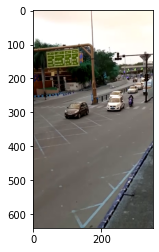

In [ ]:
import matplotlib.pyplot as plt
image = cv2.imread("/content/download.png")
plt.imshow(image)

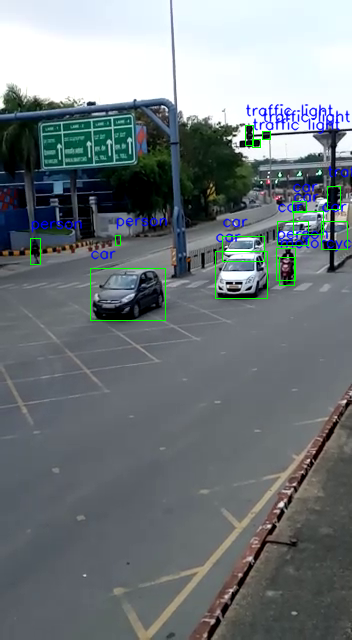

In [ ]:
    transform = torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
       
    ])
    input_image = transform(image)
    with torch.no_grad():
        output = model([input_image])
         # Draw the predicted bounding boxes on the image
        boxes = output[0]['boxes']
        labels = output[0]['labels']
        scores = output[0]['scores']
        num = torch.argwhere(scores>0.7).shape[0]
        #input_image=input_image.numpy()
        for i in range(num):
          x1,y1,x2,y2 = boxes[i].numpy().astype("int")
          class_name = coco_names[labels.numpy()[i]-1]
          image = cv2.rectangle(image,(x1,y1),(x2,y2),(0,255,0),1)
          image = cv2.putText(image,class_name,(x1,y1-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,0,0),1,cv2.LINE_AA)
        cv2_imshow(image)
         

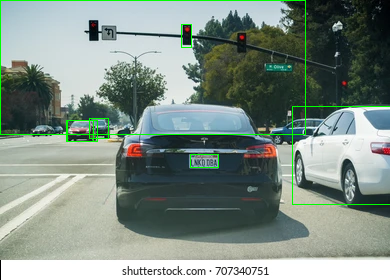

In [ ]:
cv2_imshow(image)

In [ ]:
# Load the video file using OpenCV
cap = cv2.VideoCapture('/content/whatsapp-video-2023-03-19-at-001922_5WHcZuxc.mp4')
fps = cap.get(cv2.CAP_PROP_FPS)
print(fps)
# Define the video wri
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print(width)
print(height)

30.0
352
640


In [ ]:
frames = []
while cap.isOpened():
    # Extract the next frame from the video
    ret, frame = cap.read()

    if not ret:
        break

    # Preprocess the image
    transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
    input_image = transform(frame)

    # Pass the image through the model
    with torch.no_grad():
        output = model([input_image])
           # Draw the predicted bounding boxes on the image
        boxes = output[0]['boxes']
        labels = output[0]['labels']
        scores = output[0]['scores']
        
        num = torch.argwhere(scores>0.8).shape[0]
  
        for i in range(num):
          x1,y1,x2,y2 = boxes[i].numpy().astype("int")
          class_name = coco_names[labels.numpy()[i]-1]

          frame = cv2.rectangle(frame,(x1,y1),(x2,y2),(0,255,0),1)
          frame = cv2.putText(frame,class_name,(x1,y1-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,255,0),1,cv2.LINE_AA)
    
    frames.append(frame)    
    cv2_imshow(frame)

cap.release()
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np

output_file = '/content/output.mp4'
frame_size = (352,640)
fps = 30

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_file, fourcc, fps, frame_size)

for frame in frames:
    out.write(frame)

out.release()